# **Let's get it - 파이썬 프로그래밍**
---
## **Part2**
### 11. 프로젝트로 파이썬 완성하기: 핫플레이스 인구 분석
    프로젝트 목표: 핫플레이스의 인구 분석

#### **11.1 데이터 선정하기**
- 데이터셋
    * 인구 데이터: 서울 생활인구(내국인)_행정동 단위 19년 12월 데이터
    * 행정동코드 데이터: 행정구역 코드정보
- 출처: 서울 열린데이터 광장

#### **11.1.2 목표 수립하기**
- 목표: 핫플레이스가 있는 행정동에서 인구가 가장 적은 시간대 파악하기
    - 하위 목표1: 핫플레이스가 있는 행정동의 시간대별 평균인구 그래프를 그려 분석하기
        - 꺽은선 그래프
    - 하위 목표2: 핫플레이스가 있는 행정동의 주중/주말 시간대별 평균인구 그래프를 그려 분석하기
        - 꺽은선 그래프, 막대그래프
    - 하위 목표3: 핫플레이스가 있는 행정동의 남녀 시간대별 평균인구 그래프를 그려 분석하기
        - 꺽은선 그래프, 가로형 막대그래프
    - 하위 목표4: 핫플레이스가 있는 행정동과 나에게 익숙한 행정동의 사간대별 평균인구 그래프를 그려 비교 분석하기
        - 꺽은선 그래프

#### **11.2 프로그램으로 구현하기**

In [2]:
# 라이브러리 불러오기
import csv
import matplotlib.pyplot as plt

In [3]:
# 인구 데이터파일 불러오기
path1 = 'C:/Users/SanghoonOh/ai03/HotPlace_Analysis/Datasets/LOCAL_PEOPLE_DONG_201912.csv'

f = open(path1, encoding='utf8')

data = csv.reader(f)
next(data)
data = list(data)
print('데이터 수:', len(data))

데이터 수: 315456


In [4]:
# 행정동코드 데이터파일 불러오기
path2 = 'C:/Users/SanghoonOh/ai03/HotPlace_Analysis/Datasets/행정동코드_매핑정보_20200325.csv'

f2 = open(path2, encoding='utf8')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)
print('데이터 수(행정동의 수):', len(code_data))

데이터 수(행정동의 수): 424


In [5]:
print(data[0])

['20191201', '00', '11215710', '45694.998800000001', '452.3937', '208.7971', '1267.7678000000001', '5642.9234999999999', '5433.6800999999996', '2494.5992999999999', '1691.4830999999999', '1042.7095999999999', '1058.3378', '895.46389999999997', '875.9212', '601.90970000000004', '496.2165', '850.68200000000002', '388.40050000000002', '180.37209999999999', '1586.7039', '6973.6175999999996', '4259.7021999999997', '2036.1446000000001', '1285.4200000000001', '794.6241', '833.71789999999999', '772.14170000000001', '773.21519999999998', '827.14549999999997', '565.53779999999995', '1405.3706999999999', '']


In [6]:
# 데이터 타입 변환하기: 1~2열-int / 3열 이상-float
for row in data:
    for i in range(1, 32):
        if i <= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [7]:
print(code_data[0])

['1101053', '11110530', '서울', '종로구', '사직동']


In [8]:
# 행정동코드 열 int로 변환하기
for row in code_data:
    row[1] = int(row[1])
print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [9]:
# 행정동명과 행정동코드 연결하기
dong_name = input('행정동을 입력하세요--->')

for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]
print(dong_name, '-', dong_code, '을(를) 분석합니다!')

행정동을 입력하세요--->압구정동
압구정동 - 11680545 을(를) 분석합니다!


### 11.2.2 하위 목표1 - 시간대별 인구 분석하기

In [14]:
# 시간대별 인구 리스트 만들기(0시~23시)
population = [0 for i in range(24)]
print(population)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        population[time] += p
population = [p/31 for p in population]

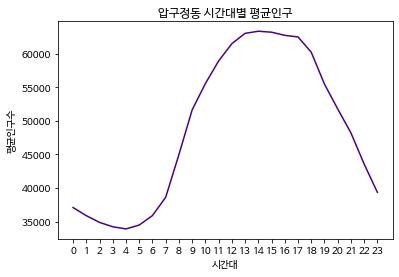

In [17]:
plt.title(dong_name + ' 시간대별 평균인구')
plt.plot(range(24), population, color='indigo')
plt.xticks(range(24), range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

### 결과 분석
- 인구가 가장 적은 시간은 1시 ~ 6시 사이
    - 새벽에는 인구 움직임이 적으니, 대부분 압구정 거주 인원으로 추정
- 가장 인구가 많은 시간은 12시 ~ 18시 사이
    - 평균인구 약 6만명으로 출근 및 등교 인원
- **오전 10시 ~ 11시 브런치 약속이나 19시 이후 저녁 약속 추천**